1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


(array([0.00970562, 0.01941125, 0.01941125, 0.00970562, 0.07764499,
        0.02911687, 0.05823374, 0.04852812, 0.14558436, 0.12617311,
        0.16499561, 0.23293498, 0.34940247, 0.29116872, 0.40763621,
        0.35910809, 0.44645871, 0.39793059, 0.35910809, 0.33969684,
        0.27175748, 0.22322936, 0.07764499, 0.10676187, 0.12617311,
        0.06793937, 0.00970562, 0.01941125, 0.02911687, 0.02911687]),
 array([-3.30789995, -3.10183386, -2.89576778, -2.68970169, -2.4836356 ,
        -2.27756951, -2.07150342, -1.86543733, -1.65937125, -1.45330516,
        -1.24723907, -1.04117298, -0.83510689, -0.6290408 , -0.42297472,
        -0.21690863, -0.01084254,  0.19522355,  0.40128964,  0.60735573,
         0.81342181,  1.0194879 ,  1.22555399,  1.43162008,  1.63768617,
         1.84375226,  2.04981834,  2.25588443,  2.46195052,  2.66801661,
         2.8740827 ]),
 <BarContainer object of 30 artists>)

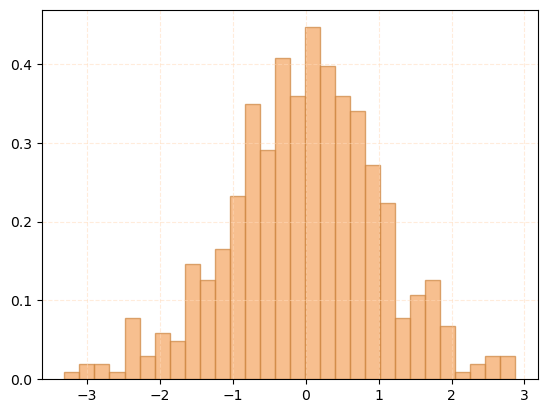

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import norm
array= np.random.normal(0,1,500)
plt.grid(linestyle='--', color='peachpuff', zorder=-1, alpha=0.5)
plt.hist(array, bins=30, density=True, edgecolor='peru', color='sandybrown', alpha=0.7 )


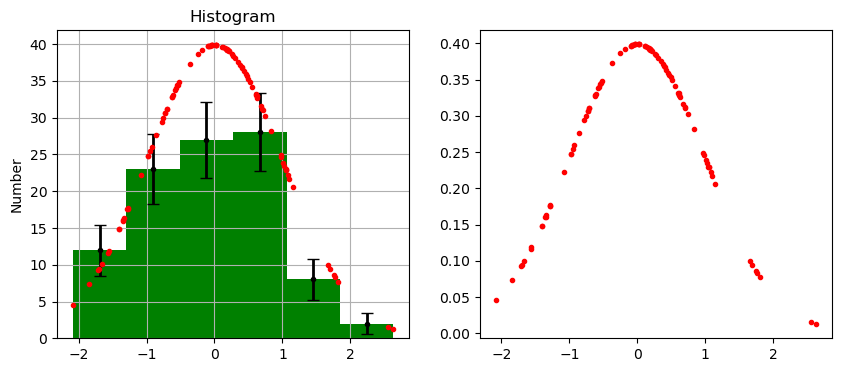

98.35528474956953
73.07182782717724
None


In [8]:
#1  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import norm
N = 100 #size of the data set
x = np.random.normal(size=N)#np.random.normal(loc=mean,scale=std_dev,size=int/tuple of ints)
#print(x,type(x))  #100 numbers whose mean is 0 and std. dev is 1
#k = int(np.log2(N)+1)  #if used np.ceil() returns the higher rounded integer value #No. of bins, Sturges formula which assumes Normal distribution an alternative to square root rule 
#k=int(np.sqrt(N))
#print(N,k)
k = 6
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10, 4));

n, binEdges, patches = ax1.hist(x, bins=k, facecolor='g');
ax1.yaxis.set_major_locator(MaxNLocator(integer=True));
ax1.set_ylabel('Number');
ax1.set_title('Histogram');
ax1.grid(True);
#print(n)
#print(bins)
#print(np.array(patches)[0])
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
Std = np.sqrt(n)   #error being poisson uncertainity
ax1.errorbar(bincenters, n, yerr=Std,fmt='.k',elinewidth=2,capsize=4 ); 
ax1.plot(x, N*norm.pdf(x),'r.', label='norm pdf')#Each y axis value is multipled by N, where we are scaling it
ax2.plot(x, norm.pdf(x),'r.', label='norm pdf')
plt.show()
# ----------------------------------------------------------------
#x_gauss = np.linspace(min(x),max(x),200)
#Gauss_integral = np.trapz(norm.pdf(x_gauss)*N,x_gauss)
#print(Gauss_integral)

#The main factor that helps in matching the histogram with the gaussian curve is the k=number of bins.

I = np.trapz(norm.pdf(np.sort(x))*N,np.sort(x))#we need to sort it in ascending order since we are taking an integral from low to higher x value
print(I)#ALso, we need to multiply by norm.pdf(x) by N=cardinality / no. of elements of dataset x. By, doing so we can scaleit in proper way.
#correct
binwidth = abs(binEdges[0]-binEdges[-1])/k
hist_integral = np.trapz(y=n,dx=binwidth)
print(hist_integral)
#print(n)
#print(binwidth)
#print(sum(n*binwidth))summation over n multiplied by x or dx
print(x.sort())

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

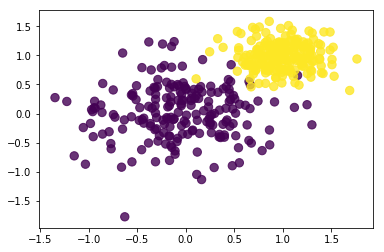

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

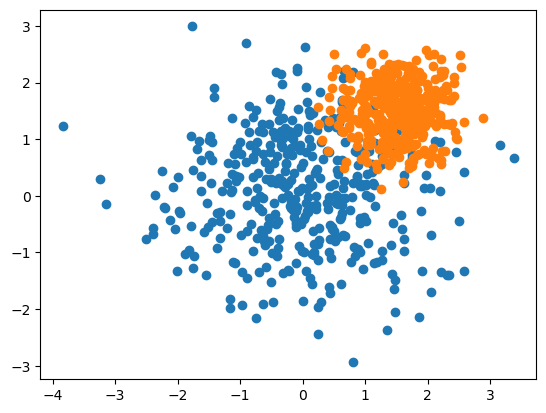

In [12]:
n = 2   # dimesionality of the data points
N = 400  # number of data points generated for each set
x = np.random.normal(loc=0.0, scale=1, size=(N,2))  # creazione di un set di random data points with normal distribution. Loc set the mean of distribution at 0.0, 'scale' set the standard deviation at 1.0, 'N', shape of array
y = np.random.normal(loc=1.5, scale=0.5, size=(N,2))
#no need to choose the colors for plotting on top of each other because python itself can differentiate
#for i in range(n):
plt.scatter(x[:,0],x[:,1],marker='o')  # satter prlot con prima e seconda variabile
plt.scatter(y[:,0],y[:,1],marker='o')

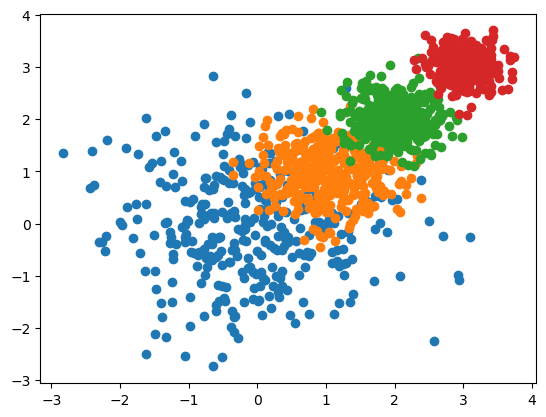

In [11]:
#Generalizing it to n categories
def Gaussian2d(n,N):#scale or std=0.5 for all and mean in steps of 1
    for i in range(n):#n is number of categories
        x=np.random.normal(loc=1*i, scale=1/(i+1), size=(N,2))#just changing the values of mean and std dev
        plt.scatter(x[:,0],x[:,1])
Gaussian2d(4,350)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot